# Prediciting heart disease using machine learning
* Use Python-based machine learning and data science libraries
* Build a machine learning model
* In an attempt to predict whether or not someone has a heart disease based on their medical a attributes

## Objectives

 * **Problem definition**
 * **Data**
 * **Evaluation**
 * **Features**
 * **Modeling**
 * **Experimentation**

### 1. Problem Definition
In a statement,
>Given clinical parameters about a patient, can we predict whether or not they have heart disease?

### 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

### 3. Evaluation
>If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project

### 4. Features

This is where you'll get different information about each of the features in your data. 

You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset)

**About the data**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

#### Importing the packages need for the project

In [4]:
# Packages for exploratory data analysis and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# show plot in notebook
%matplotlib inline

# Models from scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Load data

In [5]:
df = pd.read_csv("6.1 heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.shape

(303, 14)

### EDA (Exploratory Data Analysis)
1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data

In [7]:
# How many class are there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

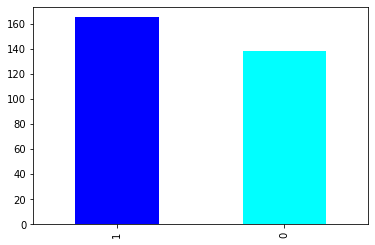

In [8]:
df["target"].value_counts().plot(kind="bar", color=["blue", "cyan"]);

In [9]:
# are there missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
# Heart disease frequency according to sex
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# comparing target with sex column
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


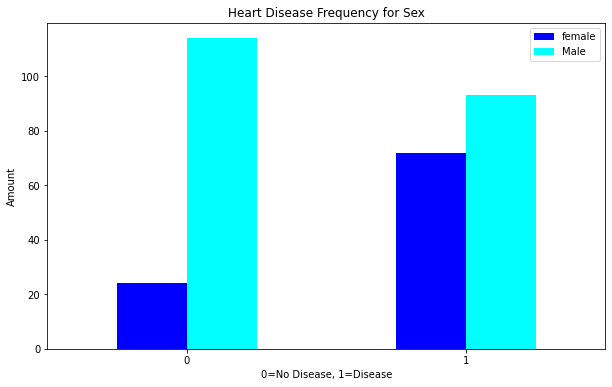

In [16]:
# plotting the crosstab
pd.crosstab(df["target"], df["sex"]).plot(kind="bar", 
                                          figsize=(10, 6),
                                          color=["blue", "cyan"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0=No Disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["female", "Male"])
plt.xticks(rotation = 0);

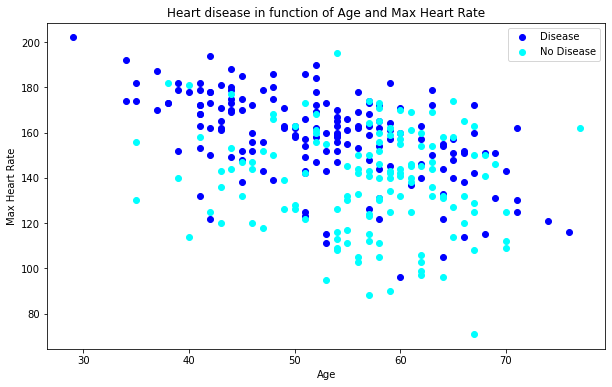

In [17]:
# scatter plot of age vs Max heart rate 
plt.figure(figsize =(10, 6))

# scatter with positive examples in blue
plt.scatter(df["age"][df["target"]==1], df["thalach"][df["target"]==1], c ="blue")

# scatter with negative examples in cyan
plt.scatter(df["age"][df["target"]==0], df["thalach"][df["target"]==0], c="cyan")


# labling the plot
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

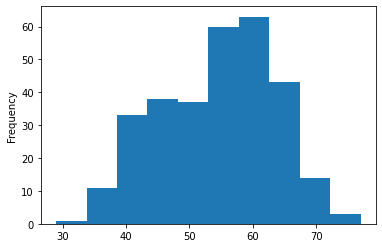

In [18]:
# age distribution
df.age.plot.hist();

In [19]:
# Heart Disease Frequency per chest pain tpe
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


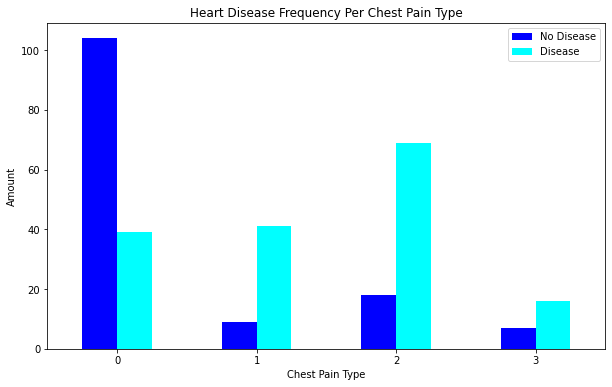

In [20]:
# visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["blue", "cyan"])

# Adding labels
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# correlation matrix of df
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


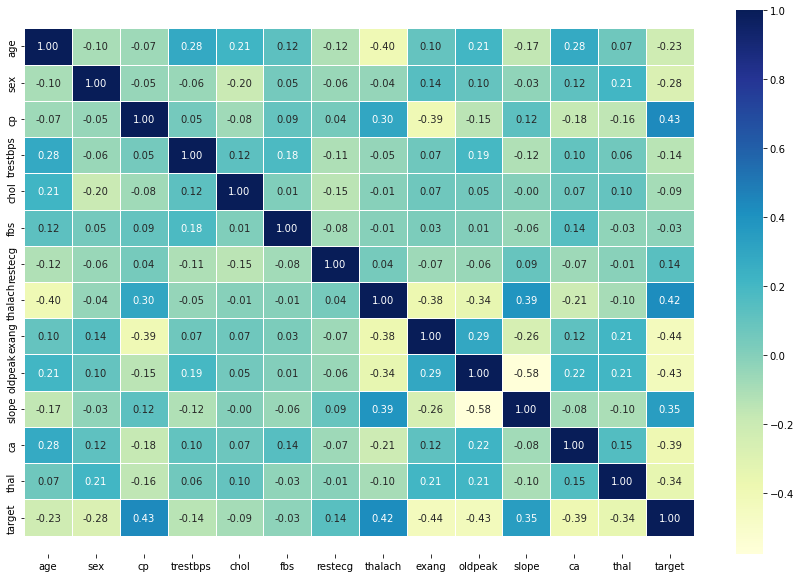

In [24]:
# Plotting the correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot =True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

### 5. Modelling

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
# Spliting data into X and y
X = df.drop("target", axis=1)
y = df.target

In [29]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [30]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [31]:
# setting random seed for reproducibility
np.random.seed(42)

# splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [32]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


**We're going to try 3 different machine learning models to fit pattern in training data:**

* Logistic Regression
* K-Nearest Neighbours Classifier
* Random Forest Classifier

In [33]:
# Creating a dictionary of models to be used
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier()}


def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # set a random seed
    np.random.seed(42)
    
    # dictionary for model score
    model_scores ={}
    
    # loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores
        
        

In [34]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test )
model_scores

C:\Users\ahiab\OneDrive\Desktop\HomeLLc_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

In [36]:
# create a DataFrame of model_score
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


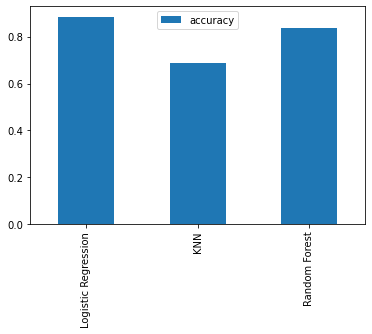

In [37]:
# transposing and plotting the model_score to visually comapre
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

**Hyperparameter tunning (by hand)**

In [39]:
# Lest's tune KNN

train_scores = []
test_scores = []


# creating a list of different values for n_neighbors
neighbors = range(1, 21)

## instantiating the KNN model
knn = KNeighborsClassifier()

# looping through the different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [40]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [41]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41 with n_neighbor: 9


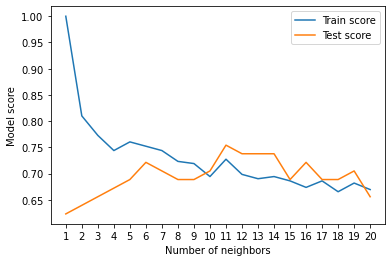

In [47]:
# plotting the train and the test score values against number of neighbors
plt.plot(neighbors, train_scores, label = "Train score")
plt.plot(neighbors, test_scores, label = "Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend();

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f} with n_neighbor: {np.argmax(test_scores)-1}")

**Hyperparameter tuning with RandomizedSearchCv**

In [57]:
# creating a hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}


# createing a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators":np.arange(10, 1000, 50),
           "max_depth":[None, 3, 5, 10],
           "min_samples_split":np.arange(2, 20, 2),
           "min_samples_leaf":np.arange(1, 20, 2)}

In [53]:
# setting a random seed
np.random.seed(42)

# Tune LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose =True)

# fit the random hyperprameter search model for LogisticRegreession
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [59]:
# checking the best hyperparameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [55]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [58]:
# setting a random seed
np.random.seed(42)

# Tune RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions = rf_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose =True)

# fit the random hyperprameter search model for RandomforestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [60]:
# Checking the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [61]:
# Evaluating the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

**Hyperparameter tunning with GridSearchCV**

In [64]:
# creating a different hyperparameter for LogisticRegression
log_reg_grid = {"C":np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Tune LogisticRegression using GridSearchCv
gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid = log_reg_grid,
                                cv = 5,
                                verbose =True)

# fit the random hyperprameter search model for LogisticRegreession
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [66]:
# check the best hyperparameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [67]:
# Evaluate the grid search LogisticRegression
gs_log_reg.score(X_test, y_test)

0.8852459016393442

### Evaluting the tunned machine learning classifier, beyound accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [68]:
# making prediction with the tuned model
y_preds = gs_log_reg.predict(X_test)

In [69]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [70]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

C:\Users\ahiab\OneDrive\Desktop\HomeLLc_project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


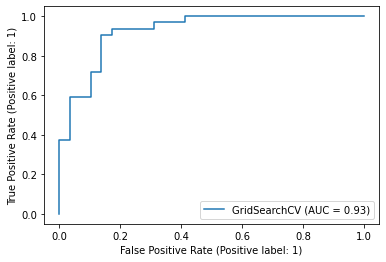

In [71]:
# plotting ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

In [72]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


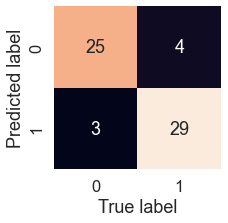

In [74]:
sns.set(font_scale = 1.5)
def plot_conf_matrix(y_test, y_preds):
    """
    Plots confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax =sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar= False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_matrix(y_test, y_preds)

In [76]:
# Classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



**Calcualting evaluation metrics using cross-validattion**

In [77]:
# get the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [78]:
# creating a new classifier with the best hyperparameters
clf = LogisticRegression(C= 0.20433597178569418, solver = "liblinear")


In [79]:
#cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv = 5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [81]:
# find the avarage
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [82]:
# cross-validated precison
cv_precision = cross_val_score(clf,
                                X,
                                y,
                                cv =5,
                                scoring="precision")

cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [83]:
# cross-validated recall
cv_recall = cross_val_score(clf,
                                X,
                                y,
                                cv =5,
                                scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [84]:
# cross-validated f1_score
cv_f1score = cross_val_score(clf,
                                X,
                                y,
                                cv =5,
                                scoring="f1")

cv_f1score = np.mean(cv_f1score)
cv_f1score

0.8673007976269721

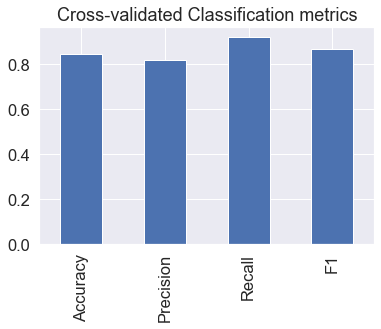

In [85]:
# Visualise cross-validated metrics

# creating a dataframe of the different metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_precision,
                           "Recall":cv_recall,
                           "F1":cv_f1score}, index=[0])


# transposing the dataframe and plotting it
cv_metrics.T.plot.bar(title = "Cross-validated Classification metrics", legend=False);

**Feature Importance**

Feature importance is another as asking,
* "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. 
* One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...


In [87]:
# create an insatnce of the LogisticRegression with the best hyperparameters
clf = LogisticRegression(C= 0.20433597178569418, solver = "liblinear")

# fit model on train data
clf.fit(X_train, y_train);

In [88]:
# check the coefficient 
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [89]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [90]:
# Match the coefficient of the features to the columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

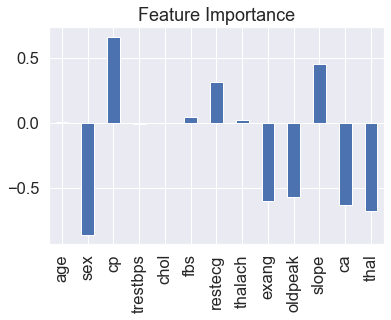

In [92]:
# visualise the feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title ="Feature Importance", legend=False);

In [93]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [94]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


### 6. Experimentation
    
If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?